In [1]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import pywt
import seaborn as sns

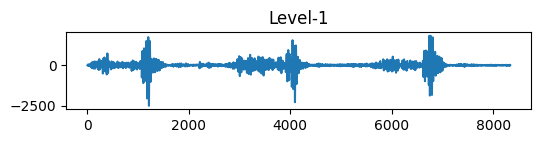

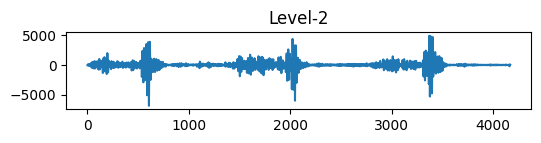

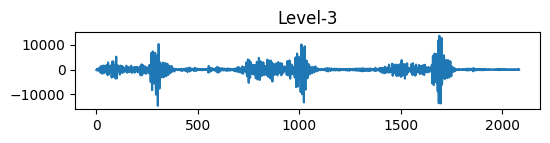

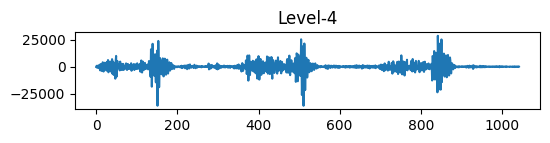

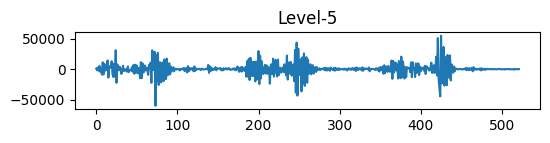

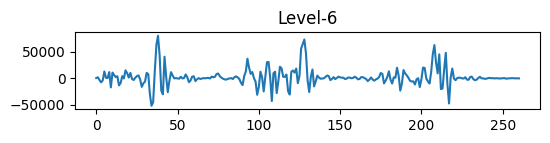

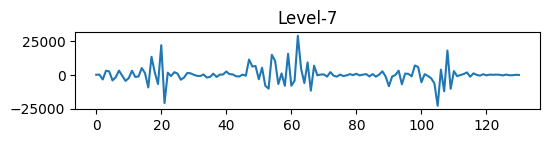

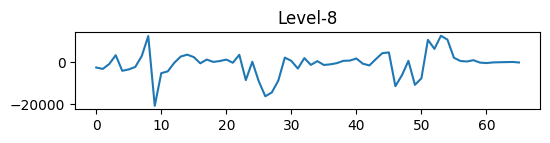

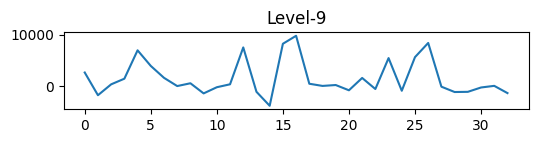

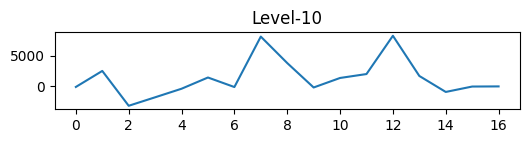

In [16]:
from pywt import wavedec
samplerate, data = wavfile.read('../data/training/MR/New_MR_002.wav')
coeffs = wavedec(data, 'db1', level=10)
coeffs2 = wavedec(data, 'db1', level=1)
cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
cA2,cAD1 = coeffs2

# cA2,cD11,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
# plt.figure(figsize=(40,20))
# sns.lineplot(data=cD1)
# plt.show()

a = [cD1,cD2,cD3,cD4,cD5,cD6,cD7,cD8,cD9, cD10]
for idx, i in enumerate(a):
  plt.figure(figsize=(6,1))
  sns.lineplot(data=a[idx])
  plt.title('Level-'+str(idx+1))
  plt.show()


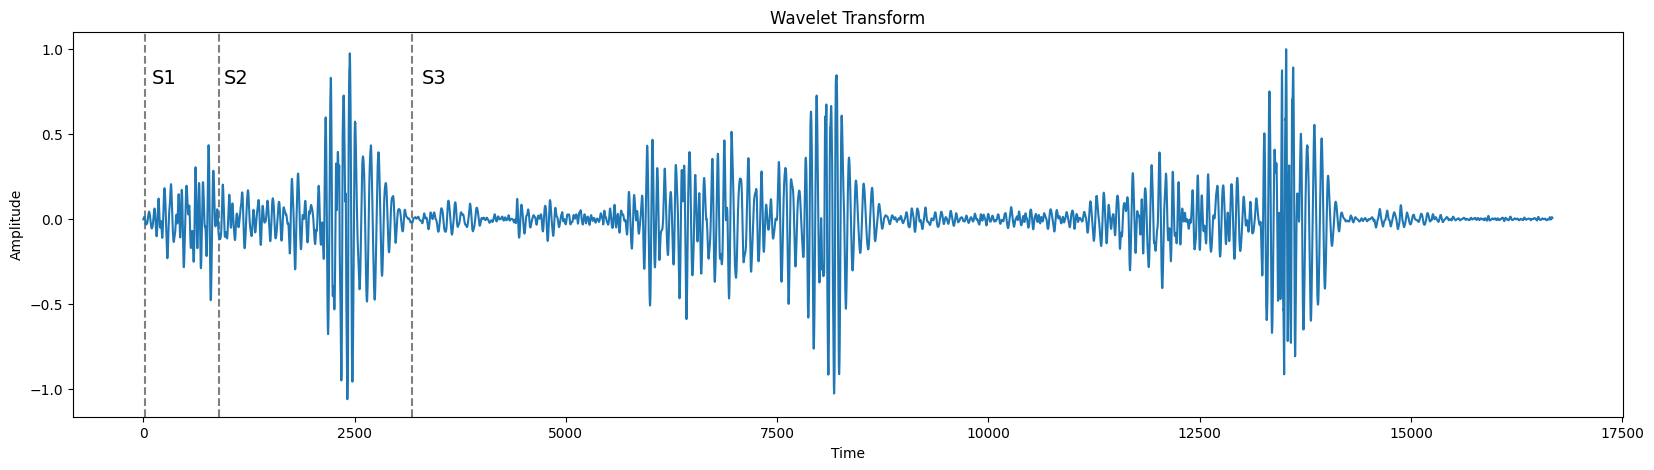

In [2]:
samplerate, data = wavfile.read('../data/DWT_NEW/MR/New_MR_002.wav')
fig, ax = plt.subplots(figsize=(20, 5))
# fig.set_size_inches(20, 5)
plt.title('Wavelet Transform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
ax.text(100, 0.8, 'S1', fontsize=14)
ax.axline((20,0.9),(20,0.2), color='gray', linestyle='--')

ax.text(950, 0.8, 'S2', fontsize=14)
ax.axline((900,1.0),(900,0.9), color='gray', linestyle='--')

ax.text(3300, 0.8, 'S3', fontsize=14)
ax.axline((3180,1.0),(3180,0.9), color='gray', linestyle='--')

sns.lineplot(data=data)
plt.show()

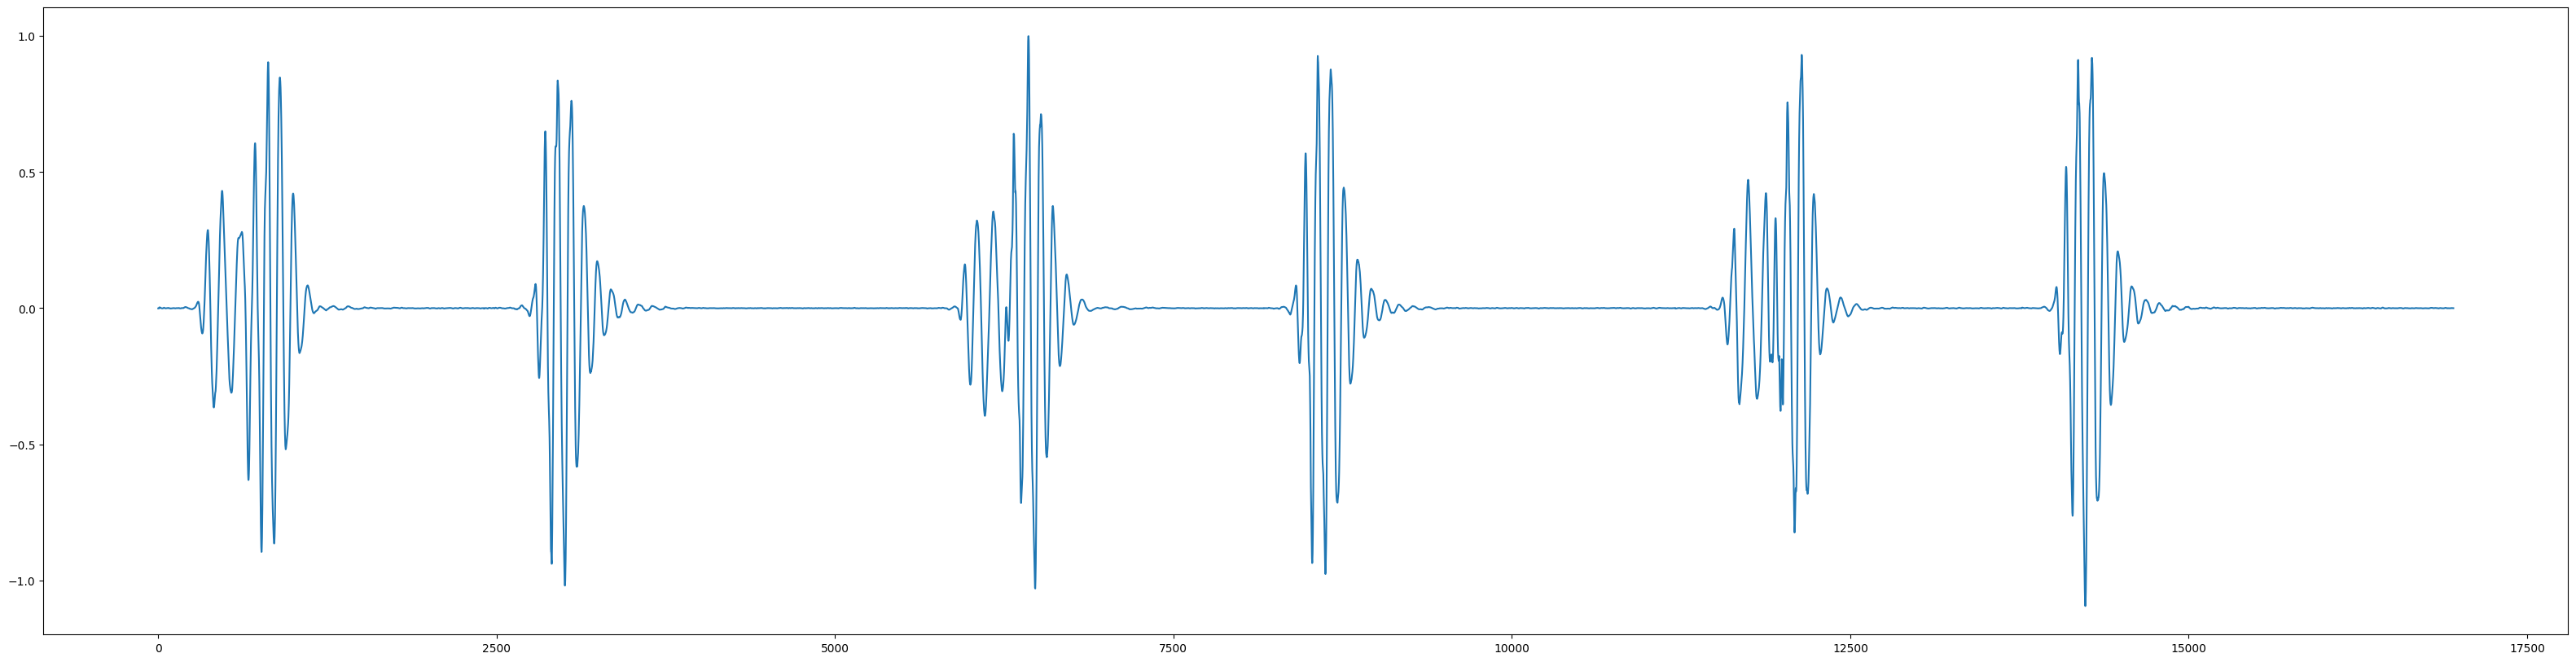

In [19]:
samplerate, data = wavfile.read('../data/DWT_NEW/N/New_N_002.wav')
plt.figure(figsize=(40,10))
sns.lineplot(data=data)
plt.show()

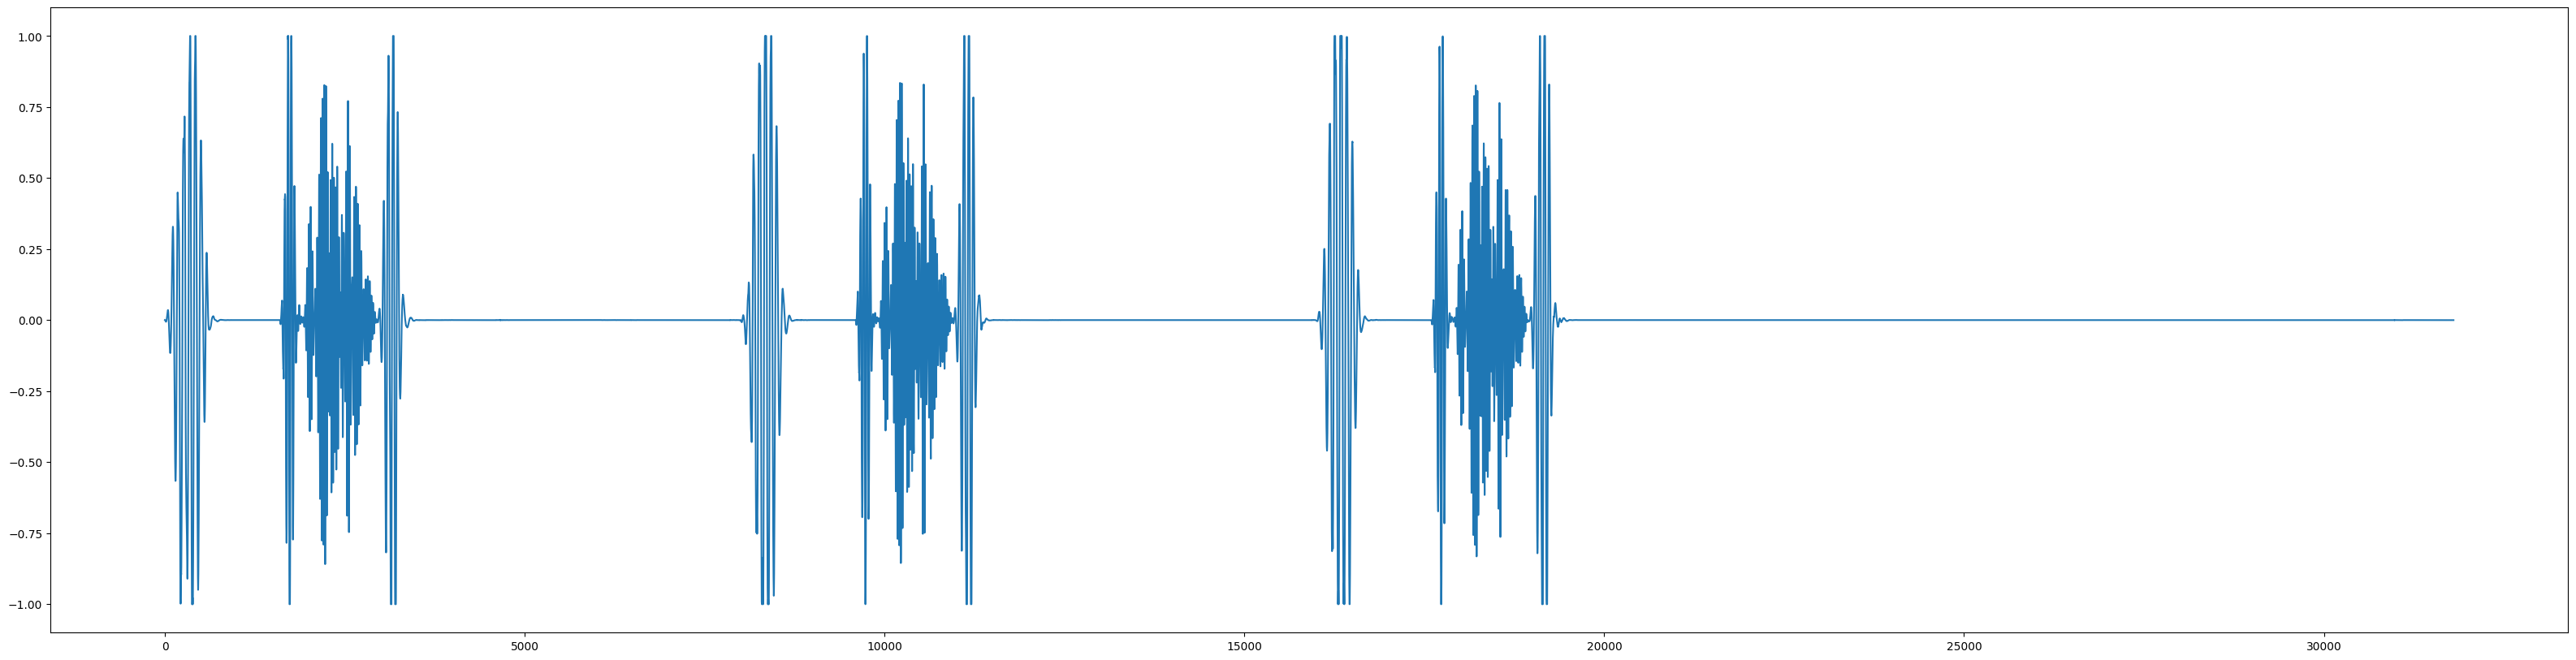

In [20]:
samplerate, data = wavfile.read('../data/DWT_NEW/MVP/New_MVP_002.wav')
plt.figure(figsize=(40,10))
sns.lineplot(data=data)
plt.show()

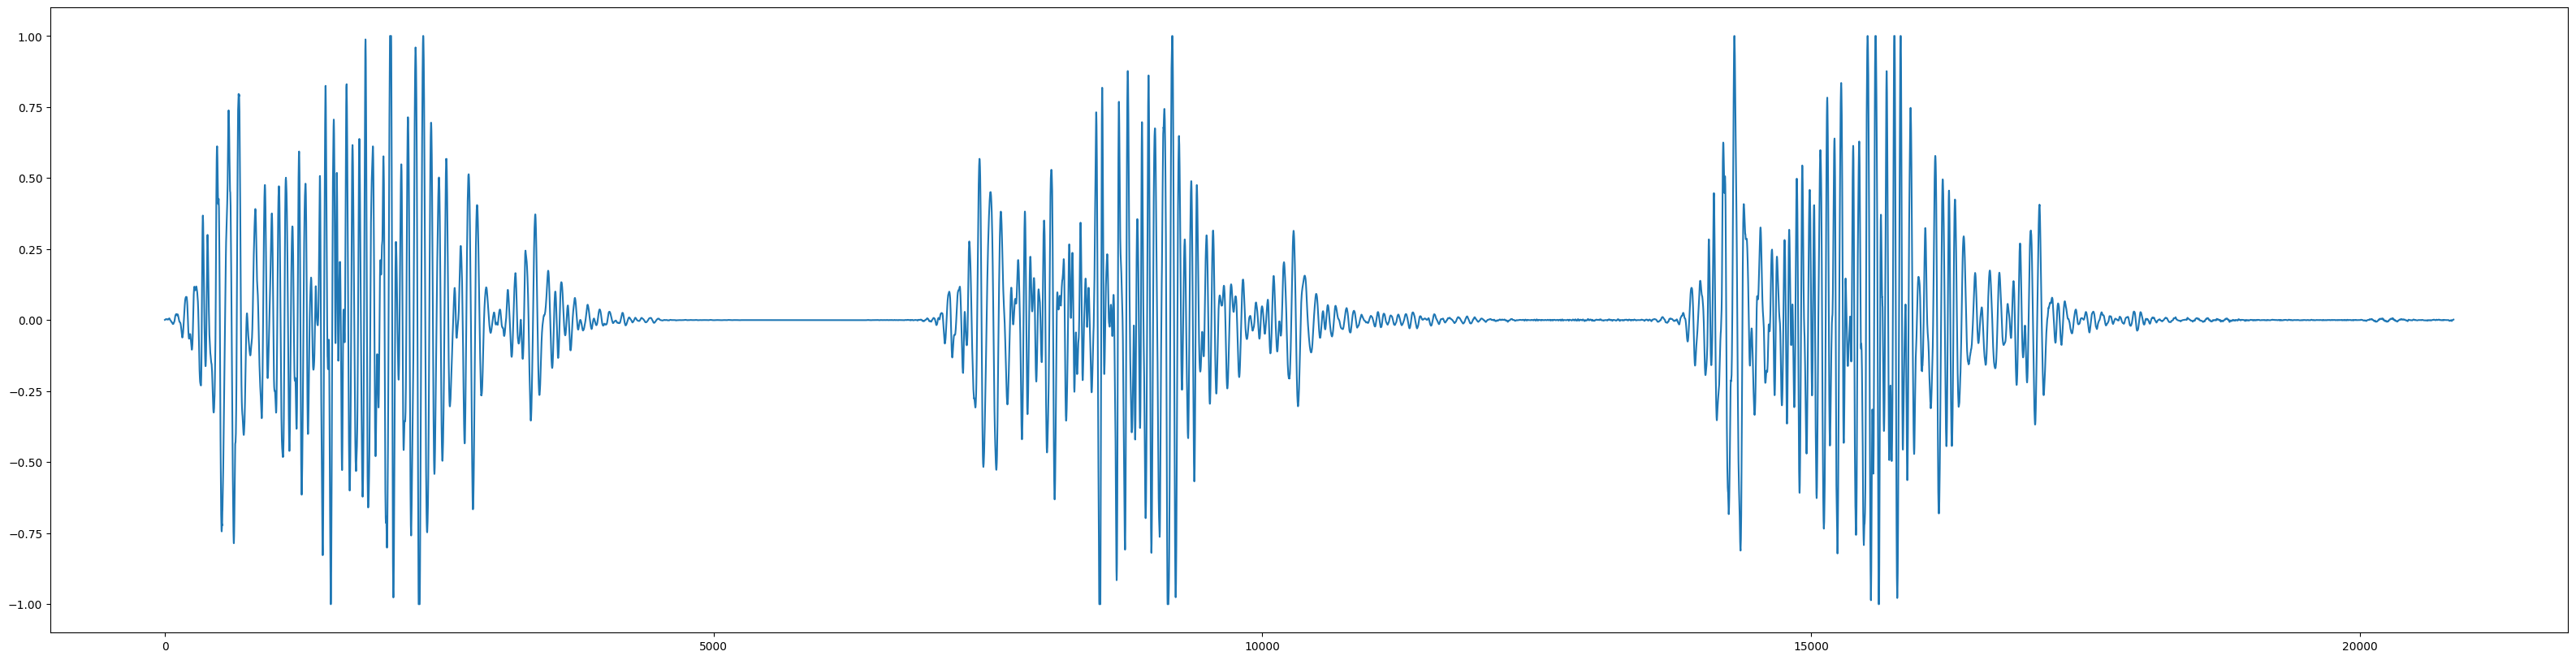

In [21]:
samplerate, data = wavfile.read('../data/DWT_NEW/AS/New_AS_002.wav')
plt.figure(figsize=(40,10))
sns.lineplot(data=data)
plt.show()

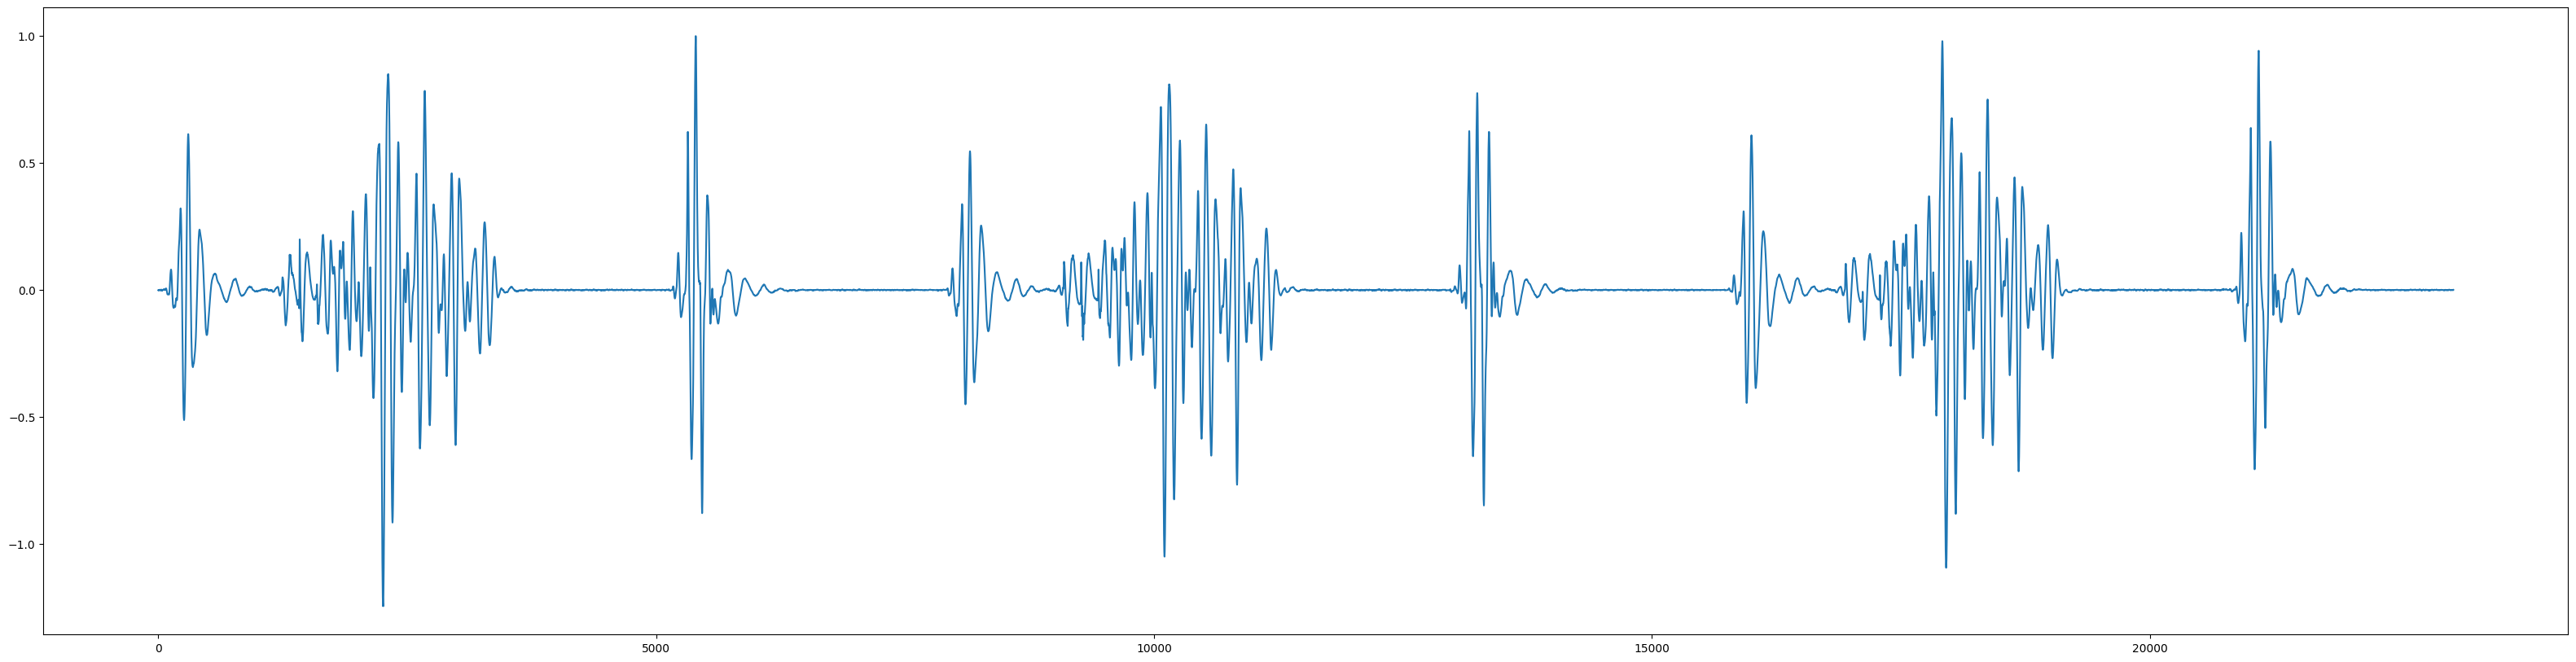

In [22]:
samplerate, data = wavfile.read('../data/DWT_NEW/MS/New_MS_002.wav')
plt.figure(figsize=(40,10))
sns.lineplot(data=data)
plt.show()

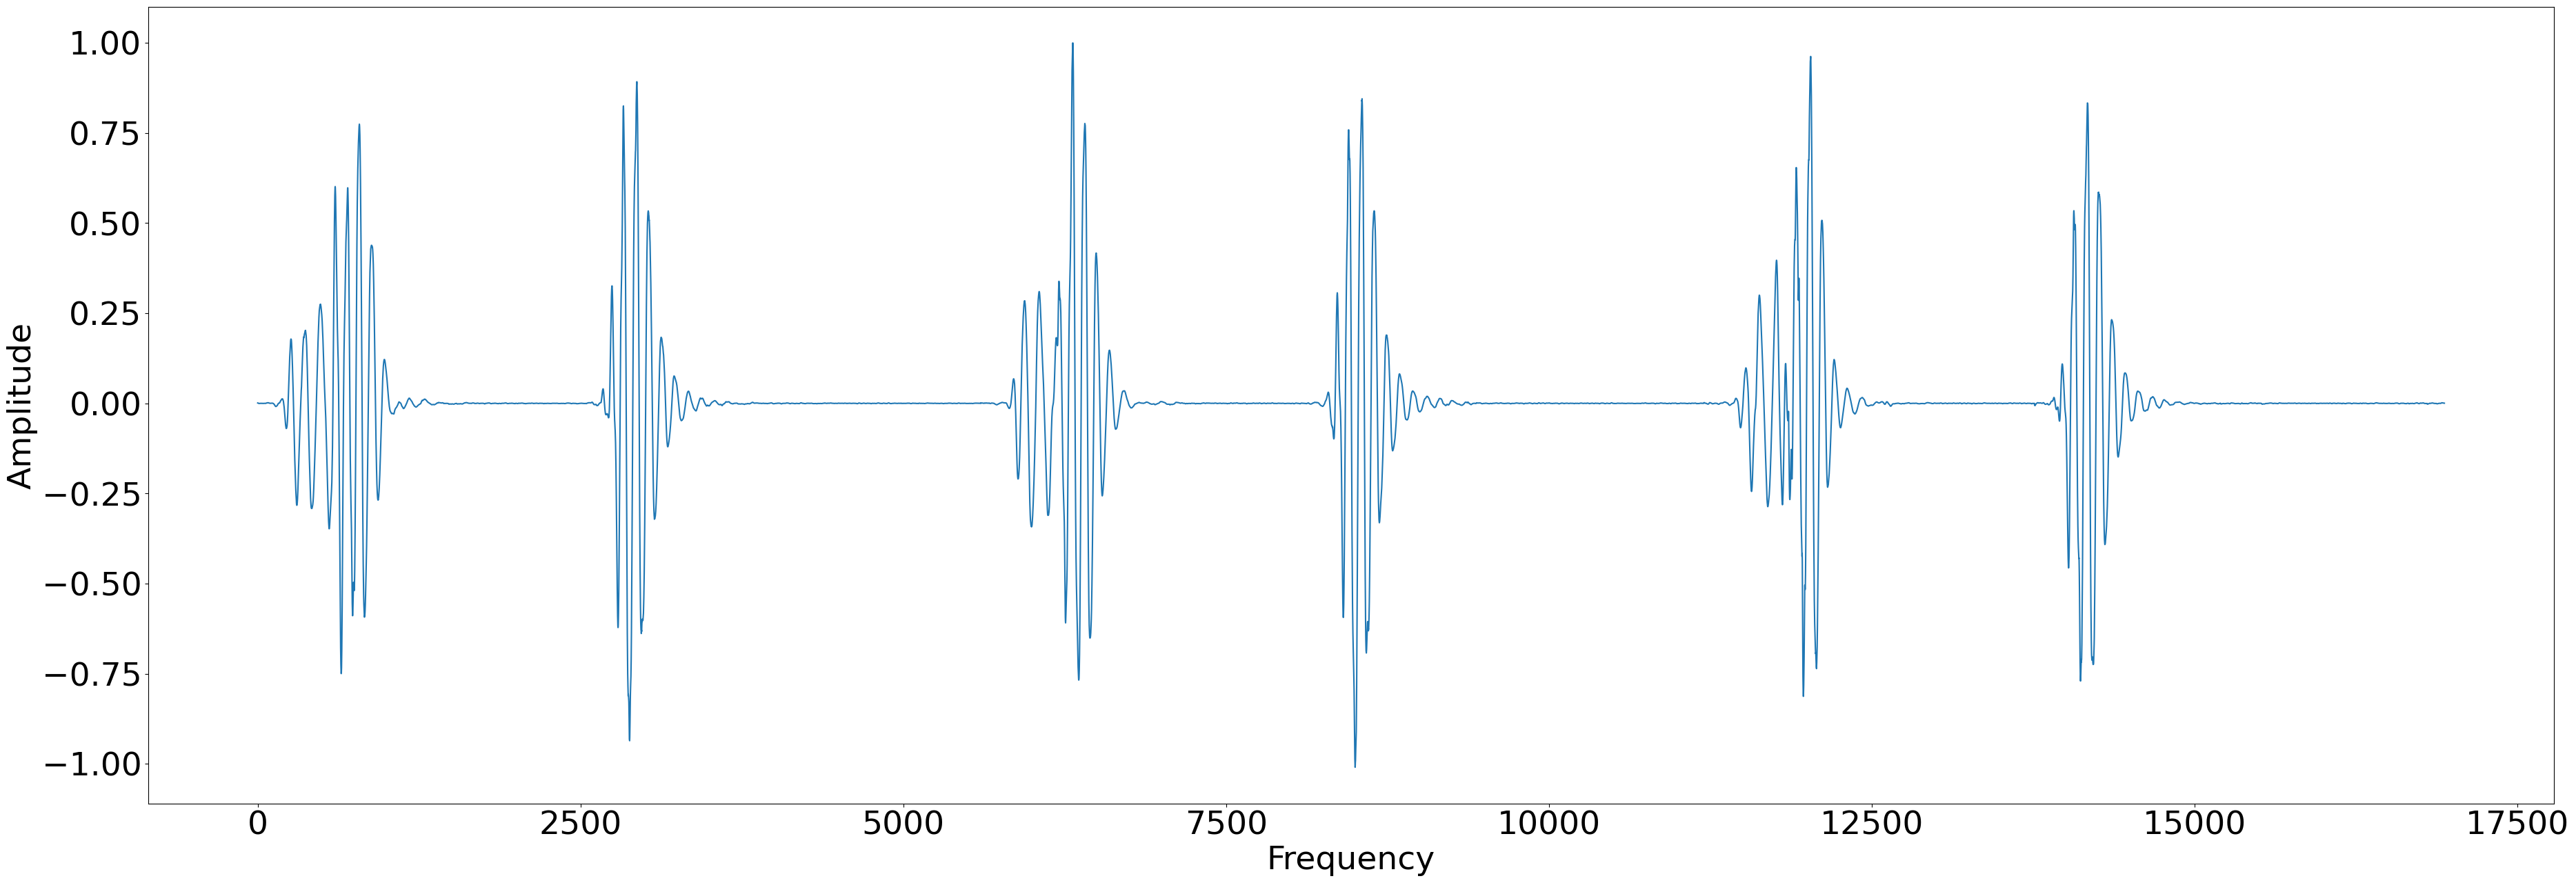

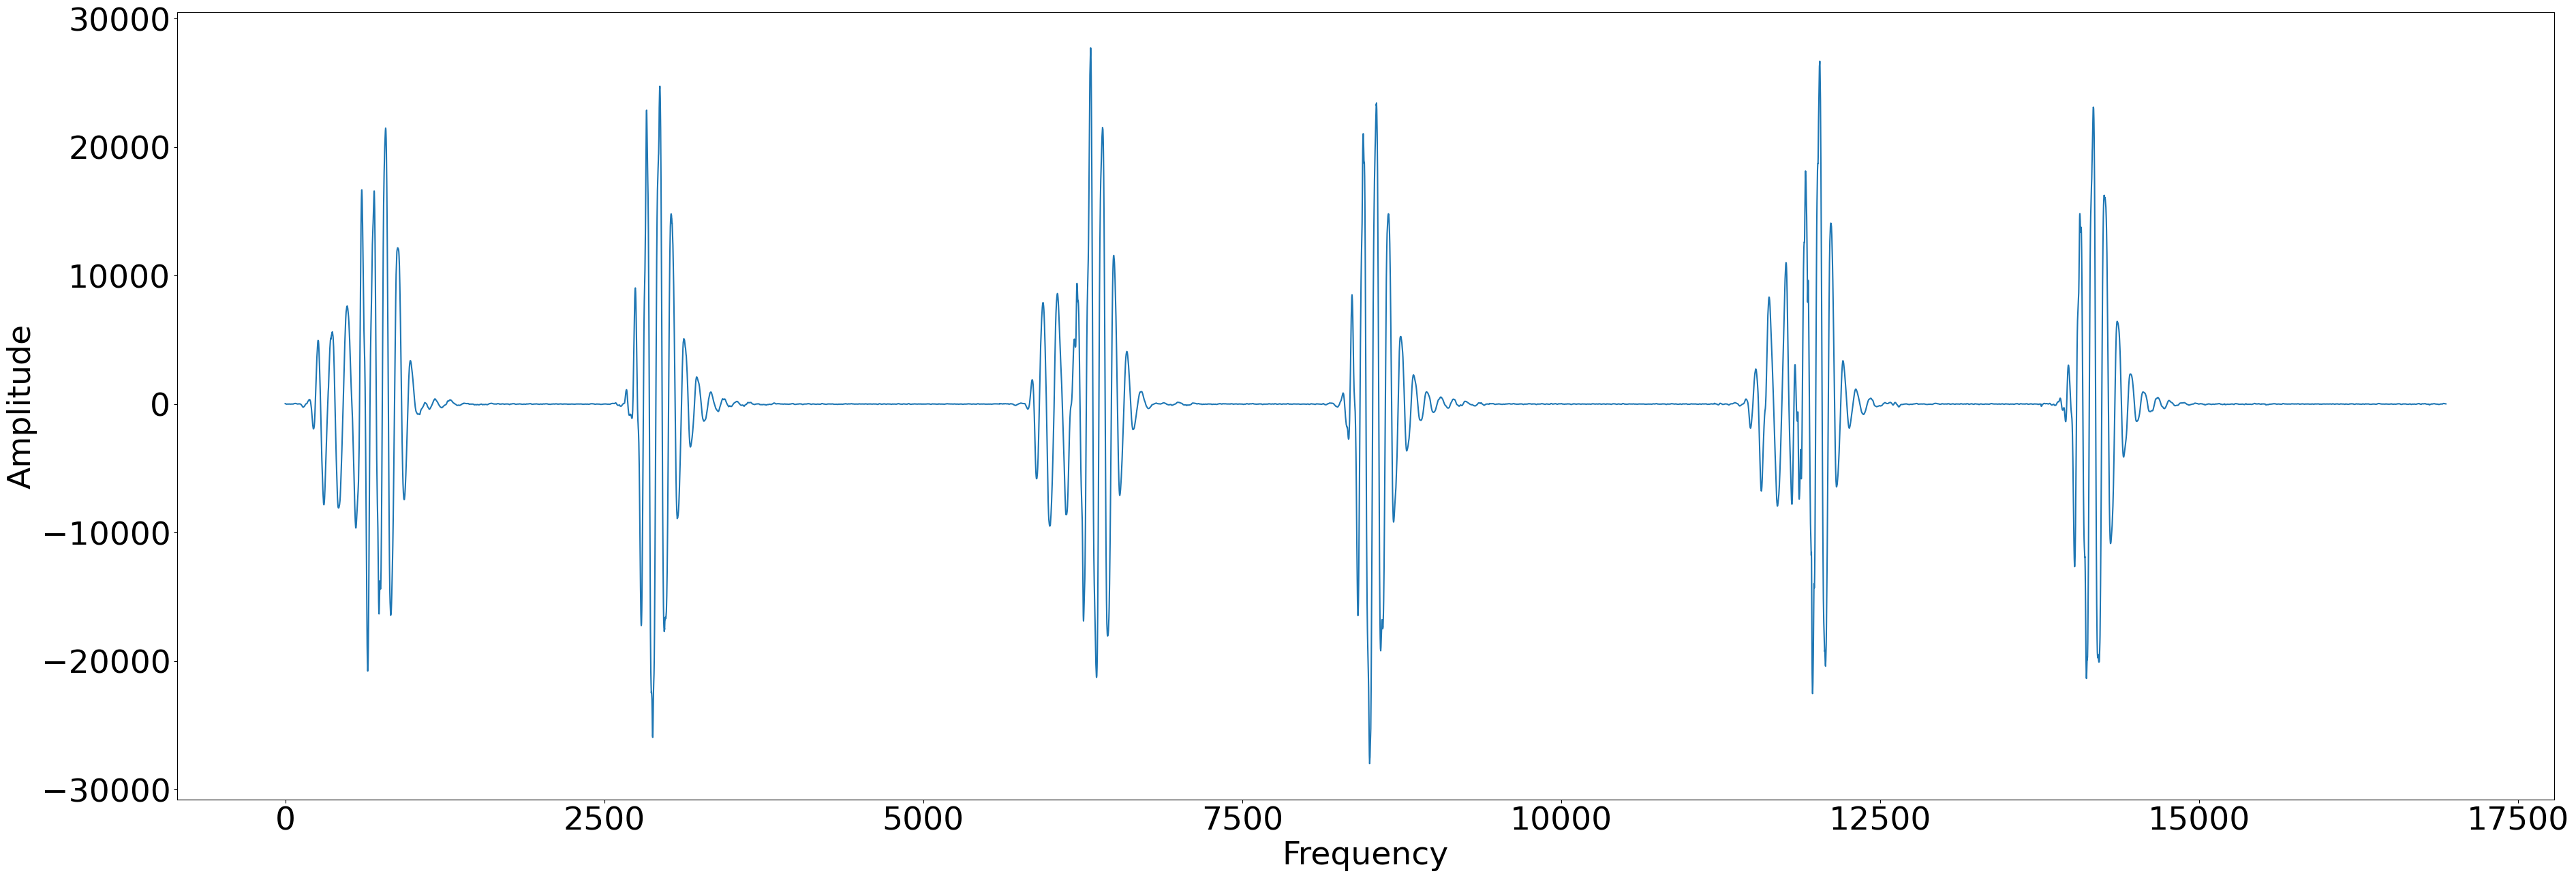

In [19]:
samplerate, data = wavfile.read('../data/DWT_NEW/N/New_N_003.wav')
plt.figure(figsize=(45,15))
sns.lineplot(data=data)
plt.yticks(fontsize=34)
plt.xticks(fontsize=34)
plt.ylabel('Amplitude', fontsize=34)
plt.xlabel('Frequency', fontsize=34)
plt.show()

samplerate, data = wavfile.read('../data/training/N/New_N_003.wav')
plt.figure(figsize=(45,15))
plt.yticks(fontsize=34)
plt.xticks(fontsize=34)
plt.ylabel('Amplitude', fontsize=34)
plt.xlabel('Frequency', fontsize=34)
sns.lineplot(data=data)
plt.show()

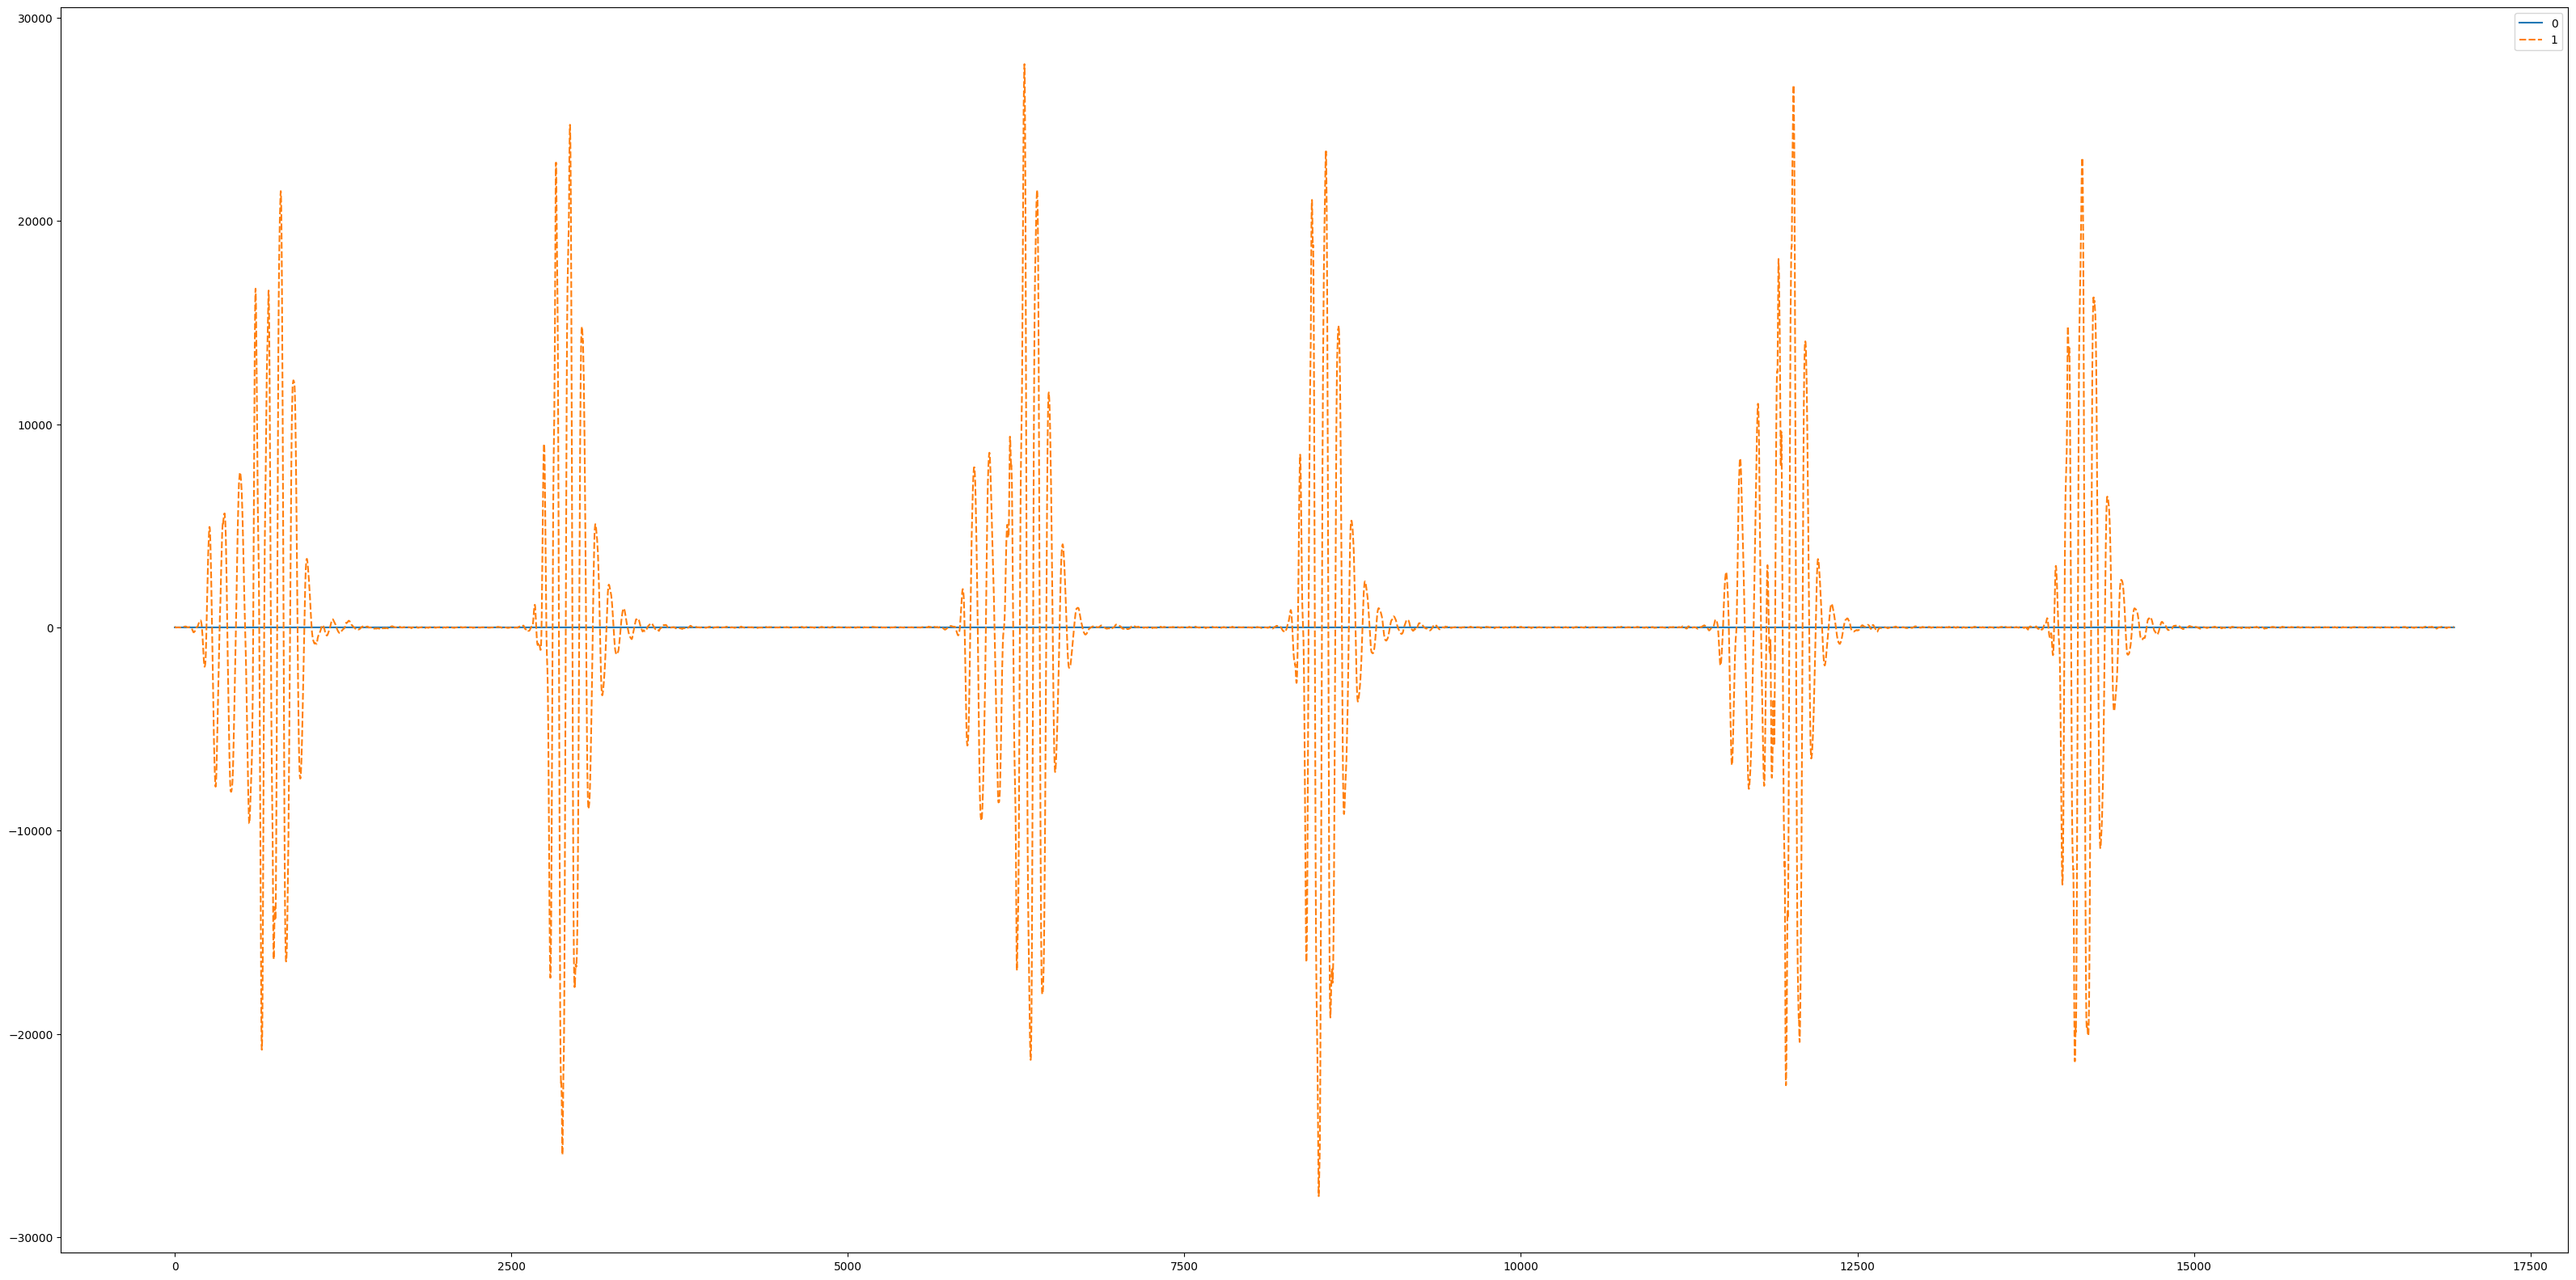

In [6]:
samplerate, data = wavfile.read('../data/DWT_NEW/N/New_N_003.wav')
samplerate2, data2 = wavfile.read('../data/training/N/New_N_003.wav')
plt.figure(figsize=(40,20))
z = [data, data2]
sns.lineplot(data=z)
plt.show()

Scatter Plot

In [3]:
import pandas as pd
import csv
import os
import numpy as np
import librosa
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf
import matplotlib.pyplot as plt
from pywt import wavedec

2023-11-07 13:23:55.529167: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-07 13:23:55.567174: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-07 13:23:55.567207: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-07 13:23:55.567233: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-07 13:23:55.573444: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-07 13:23:55.573914: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [52]:
import wave
import json
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
for i in range(1, 13):
  header += f' chroma{i}'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()


def extract_mfcc(audiofile, name):
    file = open(name, 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
    coeffs = wavedec(y, 'db1', level=10)
    cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD1, cD1 = coeffs
    mfcc = librosa.feature.mfcc(y=cD1, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
    rms = librosa.feature.chroma_stft(y=cD1, sr=8000)
    cqt = np.abs(librosa.cqt(y=cD1, sr=sr, n_bins=60))
    combined_features = np.concatenate((mfcc, rms, cqt), axis=0)
    to_append = f'Signal'
    for e in combined_features:
        to_append += f' {np.mean(e.T, axis=0)}'
    file = open(name, 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

def predict(audio):
    model = tf.keras.models.load_model(model_uri)
    extract_mfcc(audio)
    data = pd.read_csv('test.csv')
    scaler = StandardScaler()
    df = data.drop(['label', 'filename'], axis=1)
    pred = model.predict(df)
    class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
    cek = np.argmax(pred[0])
    # print(pred[0])
    # print(cek)
    print("=====")
    print(audio)
    print(f'Predicted class: {class_labels[cek]}')
    print("=====")

extract_mfcc('../data/DWT_NEW/N/New_N_001.wav', 'plot1.csv')
extract_mfcc('../data/DWT_NEW/N/New_N_002.wav', 'plot2.csv')


In [53]:
data = pd.read_csv('plot1.csv')
data1 = pd.read_csv('plot2.csv')
X = data.drop(['label', 'filename'], axis=1)
Y = data1.drop(['label', 'filename'], axis=1)
X.head()
Y.head()

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
0,-385.069763,88.667061,9.695655,-5.016496,-6.660105,-9.983366,-12.138184,-11.735545,-14.33678,-11.234036,...,0.001767,0.001235,0.001027,0.000887,0.001234,0.001754,0.001307,0.000815,0.000752,0.000721


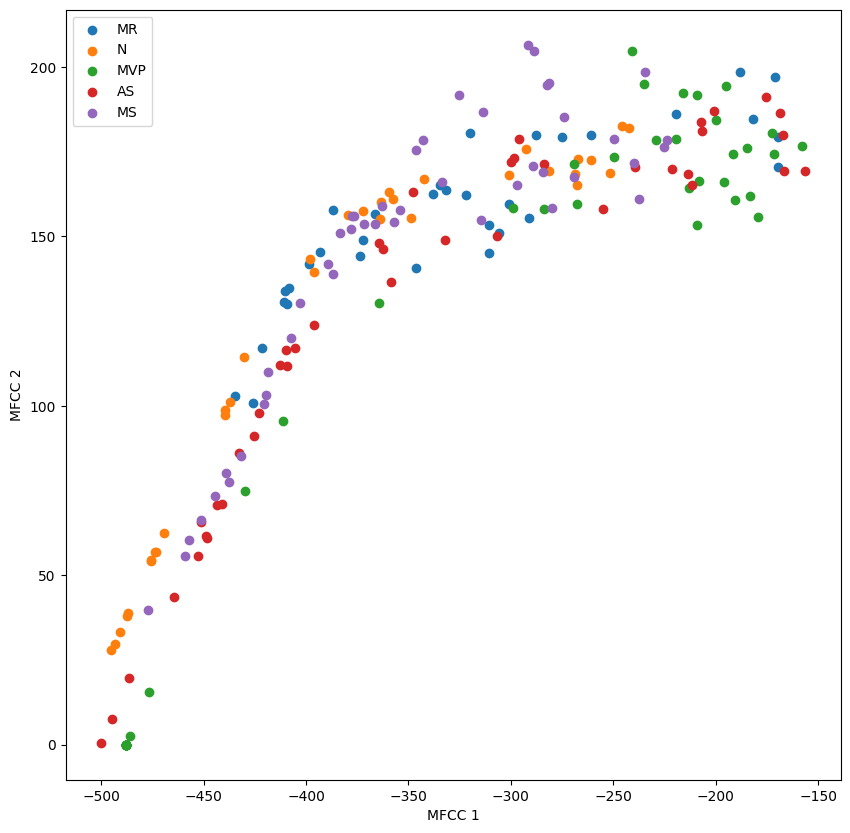

In [61]:
import pandas as pd
import librosa
import matplotlib.pyplot as plt

# define a function to extract MFCC features
def extract_mfcc(audiofile):
  y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
  mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
  return mfcc

# extract MFCC features from the audio files and store them in a pandas dataframe
data = {'filename': ['../data/DWT_NEW/MR/New_MR_002.wav', '../data/DWT_NEW/N/New_N_002.wav', '../data/DWT_NEW/MVP/New_MVP_002.wav', '../data/DWT_NEW/AS/New_AS_002.wav', '../data/DWT_NEW/MS/New_MS_002.wav'], 'label': ['MR', 'N', 'MVP', 'AS', 'MS']}
df = pd.DataFrame(data)
df['mfcc'] = df['filename'].apply(extract_mfcc)

# create the scatter plot
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(len(df)):
  ax.scatter(df['mfcc'][i][0], df['mfcc'][i][1], label=df['label'][i])
ax.legend()
ax.set_xlabel('MFCC 1')
ax.set_ylabel('MFCC 2')
plt.show()


In [64]:
df['mfcc'][i][0]
df['mfcc'][i][1]

array([155.90253 , 158.94385 , 185.2112  , 198.31345 , 178.68823 ,
       168.91266 , 166.09247 , 138.97311 ,  85.124405, 152.28375 ,
       206.49878 , 204.65613 , 156.00873 ,  66.31388 ,  73.44789 ,
       141.87584 , 153.54004 , 165.11865 , 176.20683 , 178.29437 ,
       167.36234 , 154.66208 , 150.89354 , 103.28971 , 100.54645 ,
       191.56828 , 194.51462 , 178.46045 ,  80.30108 ,  55.685425,
       130.1651  , 153.66815 , 154.18852 , 170.85565 , 171.728   ,
       161.12646 , 158.25229 , 157.8528  , 120.05782 ,  77.580055,
       175.41077 , 195.19482 , 186.63083 , 109.84454 ,  60.474068,
        39.633717], dtype=float32)

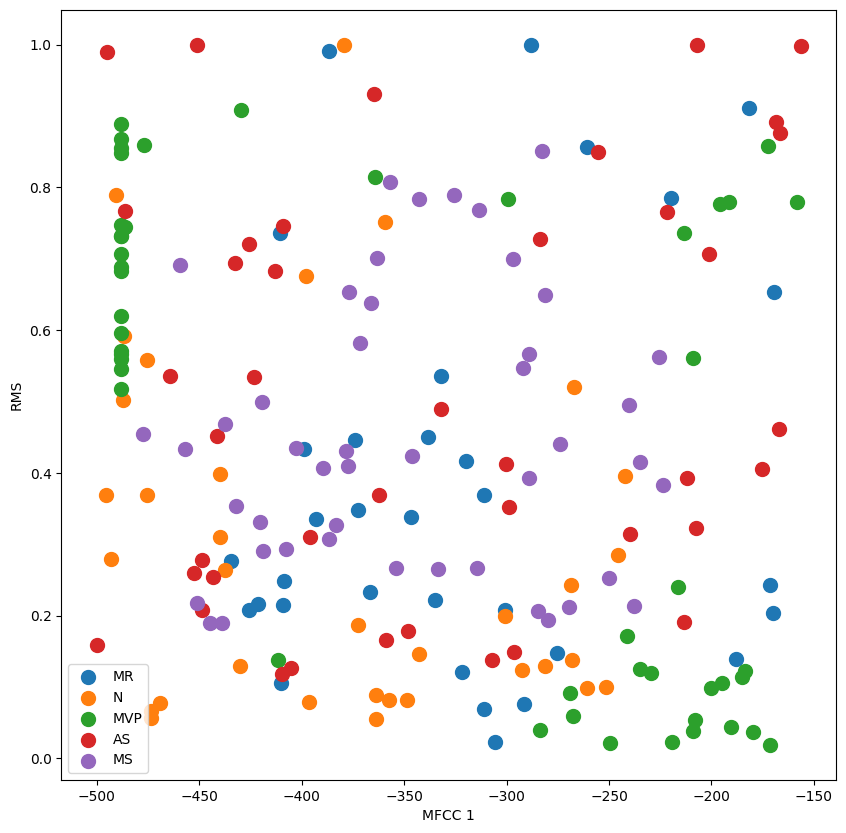

In [68]:
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt

# define a function to extract MFCC, RMS, and CQT features
def extract_features(audiofile):
  y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
  coeffs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
  rms = librosa.feature.chroma_stft(y=y, sr=8000)
  cqt = np.abs(librosa.cqt(y=y, sr=sr, n_bins=60))
  return coeffs, rms, cqt

# extract MFCC, RMS, and CQT features from the audio files and store them in a pandas dataframe
data = {'filename': ['../data/DWT_NEW/MR/New_MR_002.wav', '../data/DWT_NEW/N/New_N_002.wav', '../data/DWT_NEW/MVP/New_MVP_002.wav', '../data/DWT_NEW/AS/New_AS_002.wav', '../data/DWT_NEW/MS/New_MS_002.wav'], 'label': ['MR', 'N', 'MVP', 'AS', 'MS']}
df = pd.DataFrame(data)
df['features'] = df['filename'].apply(extract_features)

# create the scatter plot
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(len(df)):
  ax.scatter(df['features'][i][0][0], df['features'][i][1][0], label=df['label'][i], s=100)
ax.legend()
ax.set_xlabel('MFCC 1')
ax.set_ylabel('RMS')
plt.show()


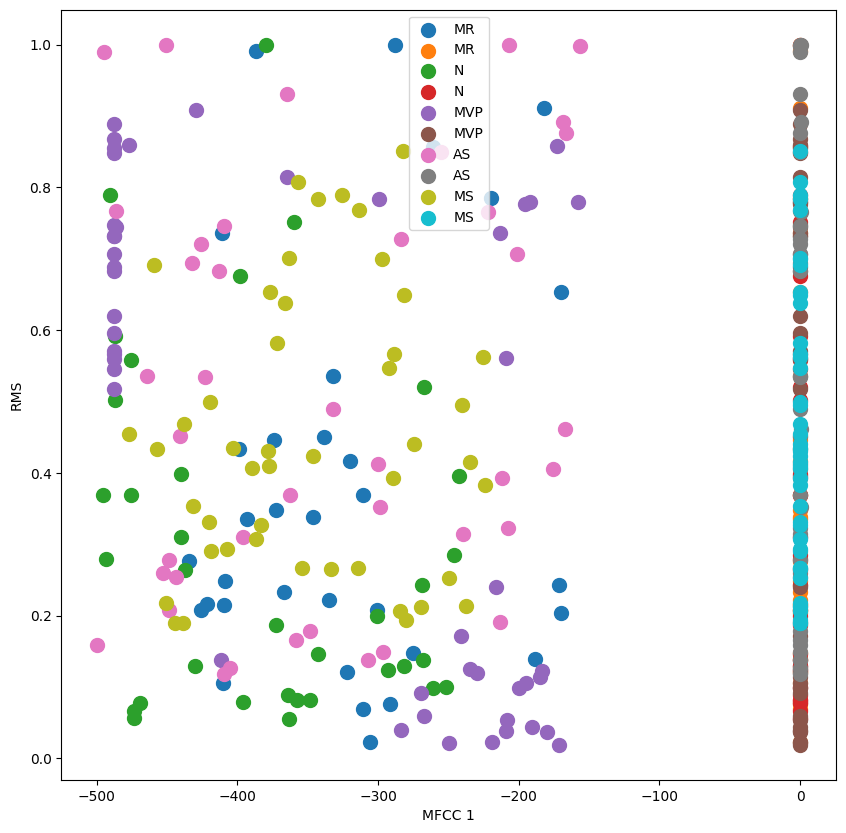

In [67]:
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt

# define a function to extract MFCC, RMS, and CQT features
def extract_features(audiofile):
  y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
  coeffs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
  rms = librosa.feature.chroma_stft(y=y, sr=8000)
  cqt = np.abs(librosa.cqt(y=y, sr=sr, n_bins=60))
  return coeffs, rms, cqt

# extract MFCC, RMS, and CQT features from the audio files and store them in a pandas dataframe
data = {'filename': ['../data/DWT_NEW/MR/New_MR_002.wav', '../data/DWT_NEW/N/New_N_002.wav', '../data/DWT_NEW/MVP/New_MVP_002.wav', '../data/DWT_NEW/AS/New_AS_002.wav', '../data/DWT_NEW/MS/New_MS_002.wav'], 'label': ['MR', 'N', 'MVP', 'AS', 'MS']}
df = pd.DataFrame(data)
df['features'] = df['filename'].apply(extract_features)

# create the scatter plot
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(len(df)):
  ax.scatter(df['features'][i][0][0], df['features'][i][1][0], label=df['label'][i], s=100)
  ax.scatter(df['features'][i][2][0], df['features'][i][1][0], label=df['label'][i], s=100)
ax.legend()
ax.set_xlabel('MFCC 1')
ax.set_ylabel('RMS')
plt.show()


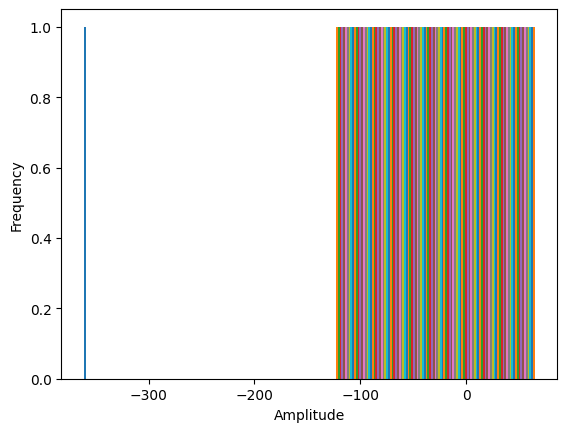

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# assume pcg_data is a numpy array containing the PCG data
plt.hist(Y, bins=2)
plt.xlabel('Amplitude')
plt.ylabel('Frequency')
plt.show()


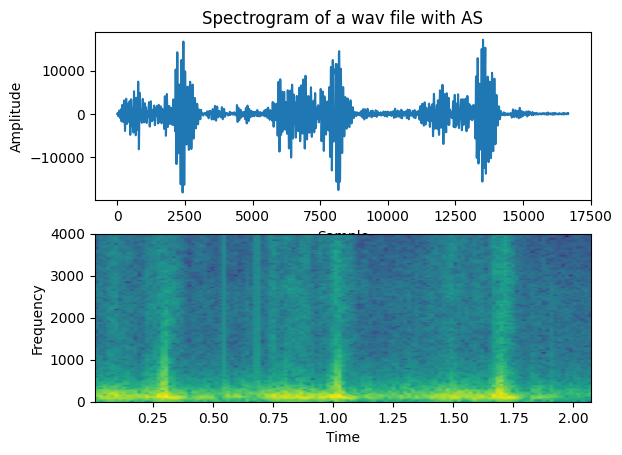

In [81]:
#import the pyplot and wavfile modules 

import matplotlib.pyplot as plot

from scipy.io import wavfile

 

# Read the wav file (mono)

samplingFrequency, signalData = wavfile.read('../data/training/MR/New_MR_002.wav')


# Plot the signal read from wav file

plot.subplot(211)

plot.title('Spectrogram of a wav file with AS') 

plot.plot(signalData)

plot.xlabel('Sample')

plot.ylabel('Amplitude')

 

plot.subplot(212)

plot.specgram(signalData,Fs=samplingFrequency)

plot.xlabel('Time')

plot.ylabel('Frequency')

 

plot.show()

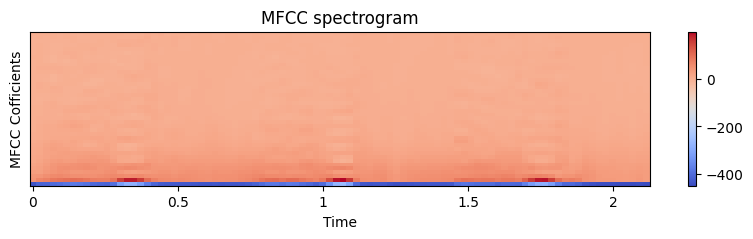

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
audio_file = '../data/DWT_NEW/MR/New_MR_003.wav'
y, sr = librosa.load(audio_file)

# Extract MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=8000, n_mfcc=40)

# Plot MFCC spectrogram
fig, ax = plt.subplots(figsize=(10, 2))
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC spectrogram')
# y axis label is MFCC number
ax.set(ylabel='MFCC Cofficients')
plt.show()

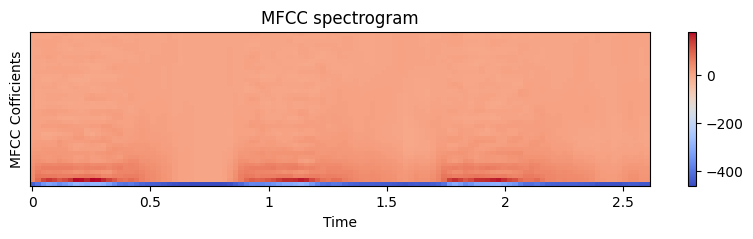

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
audio_file = '../data/DWT_NEW/AS/New_AS_003.wav'
y, sr = librosa.load(audio_file)

# Extract MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=8000, n_mfcc=40)

# Plot MFCC spectrogram
fig, ax = plt.subplots(figsize=(10, 2))
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC spectrogram')
# y axis label is MFCC number
ax.set(ylabel='MFCC Cofficients')
plt.show()

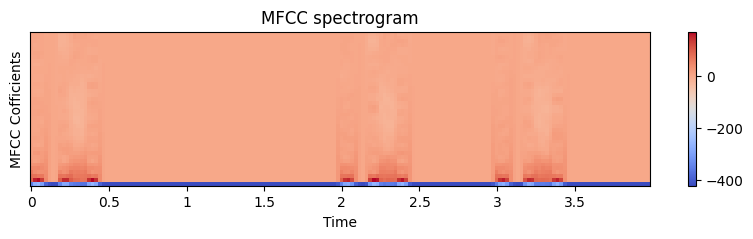

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
audio_file = '../data/DWT_NEW/MVP/New_MVP_003.wav'
y, sr = librosa.load(audio_file)

# Extract MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=8000, n_mfcc=40)

# Plot MFCC spectrogram
fig, ax = plt.subplots(figsize=(10, 2))
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC spectrogram')
# y axis label is MFCC number
ax.set(ylabel='MFCC Cofficients')
plt.show()

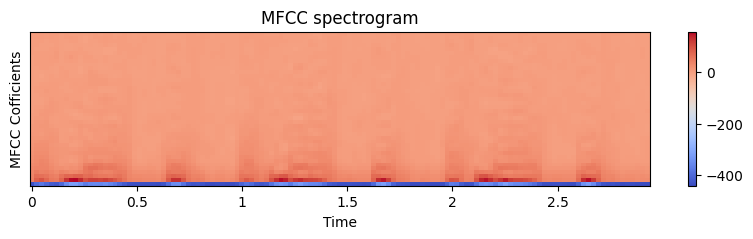

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
audio_file = '../data/DWT_NEW/MS/New_MS_003.wav'
y, sr = librosa.load(audio_file)

# Extract MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=8000, n_mfcc=40)

# Plot MFCC spectrogram
fig, ax = plt.subplots(figsize=(10, 2))
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC spectrogram')
# y axis label is MFCC number
ax.set(ylabel='MFCC Cofficients')
plt.show()

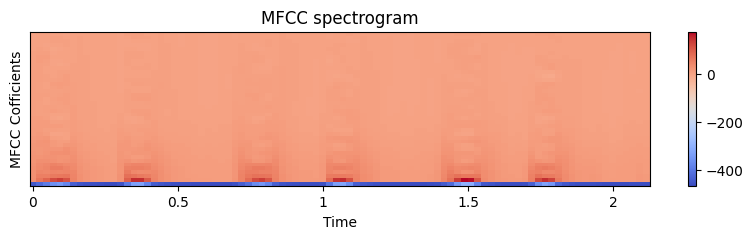

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
audio_file = '../data/DWT_NEW/N/New_N_003.wav'
y, sr = librosa.load(audio_file)

# Extract MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=8000, n_mfcc=40)

# Plot MFCC spectrogram
fig, ax = plt.subplots(figsize=(10, 2))
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC spectrogram')
# y axis label is MFCC number
ax.set(ylabel='MFCC Cofficients')
plt.show()

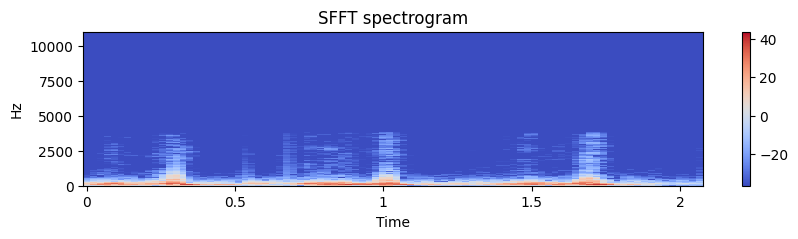

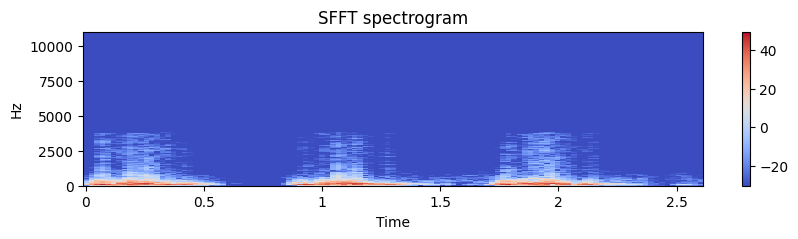

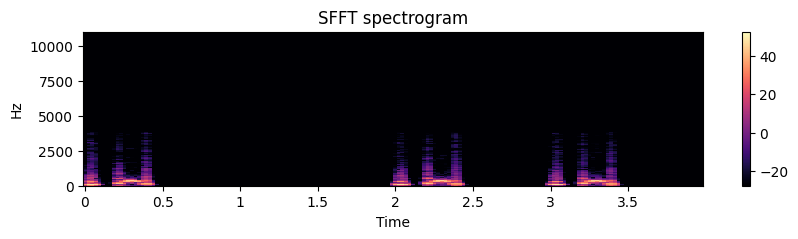

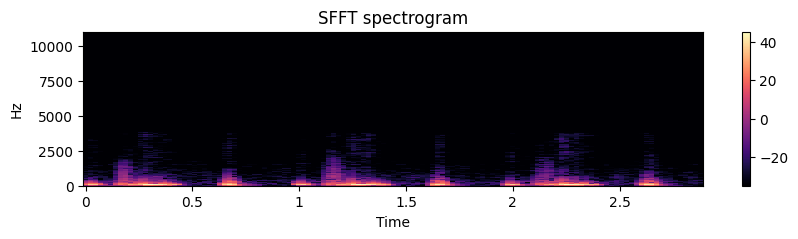

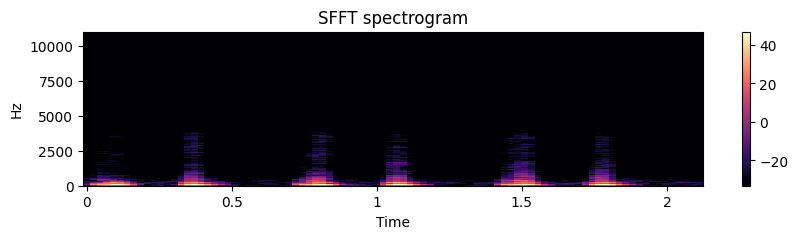

In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
audio_file = '../data/training/MR/New_MR_002.wav'
y, sr = librosa.load(audio_file)

# Compute Short-Time Fourier Transform (STFT)
stft = librosa.stft(y)

# Plot STFT spectrogram
fig, ax = plt.subplots(figsize=(10, 2))
img = librosa.display.specshow(librosa.amplitude_to_db(abs(stft)), x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='SFFT spectrogram')
plt.show()

# Load audio file
audio_file = '../data/training/AS/New_AS_002.wav'
y, sr = librosa.load(audio_file)

# Compute Short-Time Fourier Transform (STFT)
stft = librosa.stft(y)

# Plot STFT spectrogram
fig, ax = plt.subplots(figsize=(10, 2))
img = librosa.display.specshow(librosa.amplitude_to_db(abs(stft)), x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='SFFT spectrogram')
plt.show()

# Load audio file
audio_file = '../data/training/MVP/New_MVP_003.wav'
y, sr = librosa.load(audio_file)

# Compute Short-Time Fourier Transform (STFT)
stft = librosa.stft(y)

# Plot STFT spectrogram
fig, ax = plt.subplots(figsize=(10, 2))
img = librosa.display.specshow(librosa.amplitude_to_db(abs(stft)), x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='SFFT spectrogram')
plt.show()

# Load audio file
audio_file = '../data/training/MS/New_MS_002.wav'
y, sr = librosa.load(audio_file)

# Compute Short-Time Fourier Transform (STFT)
stft = librosa.stft(y)

# Plot STFT spectrogram
fig, ax = plt.subplots(figsize=(10, 2))
img = librosa.display.specshow(librosa.amplitude_to_db(abs(stft)), x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='SFFT spectrogram')
plt.show()

# Load audio file
audio_file = '../data/training/N/New_N_002.wav'
y, sr = librosa.load(audio_file)

# Compute Short-Time Fourier Transform (STFT)
stft = librosa.stft(y)

# Plot STFT spectrogram
fig, ax = plt.subplots(figsize=(10, 2))
img = librosa.display.specshow(librosa.amplitude_to_db(abs(stft)), x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='SFFT spectrogram')
plt.show()




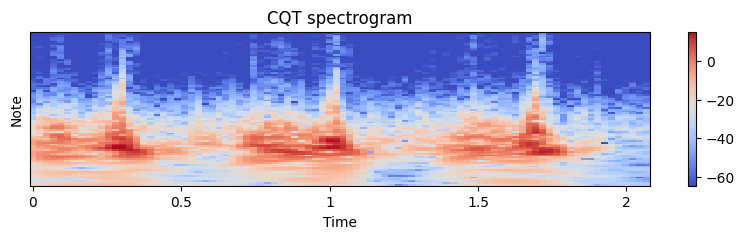

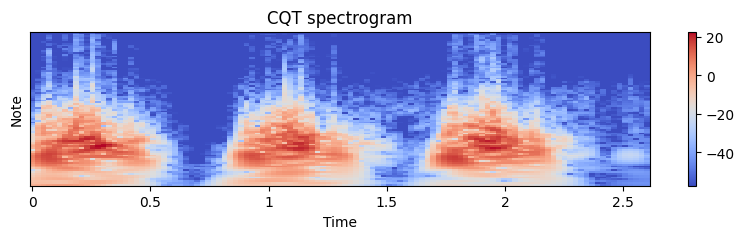

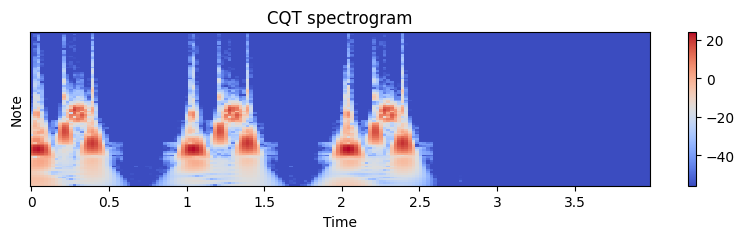

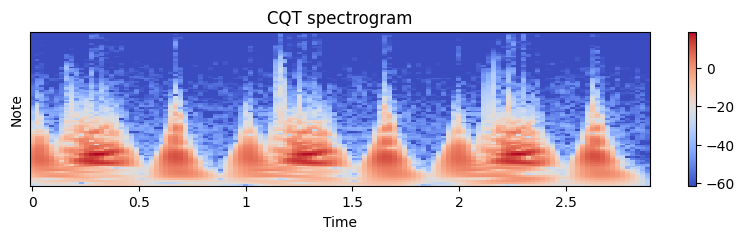

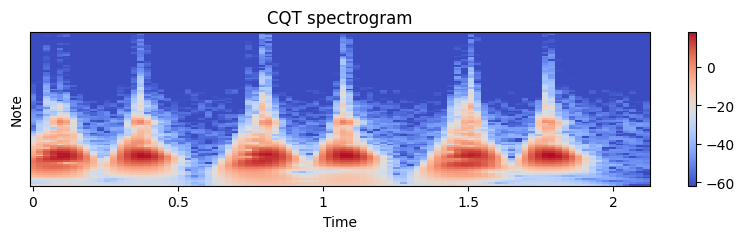

In [14]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
audio_file = '../data/training/MR/New_MR_002.wav'
y, sr = librosa.load(audio_file)

# Compute Constant-Q Transform (CQT)
cqt = librosa.cqt(y, sr=sr)

# Plot CQT spectrogram
fig, ax = plt.subplots(figsize=(10, 2))
img = librosa.display.specshow(librosa.amplitude_to_db(abs(cqt)), x_axis='time', y_axis='cqt_note', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='CQT spectrogram')
plt.show()

# Load audio file
audio_file = '../data/training/AS/New_AS_002.wav'
y, sr = librosa.load(audio_file)

# Compute Constant-Q Transform (CQT)
cqt = librosa.cqt(y, sr=sr)

# Plot CQT spectrogram
fig, ax = plt.subplots(figsize=(10, 2))
img = librosa.display.specshow(librosa.amplitude_to_db(abs(cqt)), x_axis='time', y_axis='cqt_note', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='CQT spectrogram')
plt.show()

# Load audio file
audio_file = '../data/training/MVP/New_MVP_002.wav'
y, sr = librosa.load(audio_file)

# Compute Constant-Q Transform (CQT)
cqt = librosa.cqt(y, sr=sr)

# Plot CQT spectrogram
fig, ax = plt.subplots(figsize=(10, 2))
img = librosa.display.specshow(librosa.amplitude_to_db(abs(cqt)), x_axis='time', y_axis='cqt_note', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='CQT spectrogram')
plt.show()

# Load audio file
audio_file = '../data/training/MS/New_MS_002.wav'
y, sr = librosa.load(audio_file)

# Compute Constant-Q Transform (CQT)
cqt = librosa.cqt(y, sr=sr)

# Plot CQT spectrogram
fig, ax = plt.subplots(figsize=(10, 2))
img = librosa.display.specshow(librosa.amplitude_to_db(abs(cqt)), x_axis='time', y_axis='cqt_note', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='CQT spectrogram')
plt.show()

# Load audio file
audio_file = '../data/training/N/New_N_002.wav'
y, sr = librosa.load(audio_file)

# Compute Constant-Q Transform (CQT)
cqt = librosa.cqt(y, sr=sr)

# Plot CQT spectrogram
fig, ax = plt.subplots(figsize=(10, 2))
img = librosa.display.specshow(librosa.amplitude_to_db(abs(cqt)), x_axis='time', y_axis='cqt_note', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='CQT spectrogram')
plt.show()


In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
audio_file = '../data/training/MR/New_MR_002.wav'
y, sr = librosa.load(audio_file)

# Compute Constant-Q Transform (CQT)
cqt = librosa.cqt(y, sr=sr)

# Extract MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

# Compute Short-Time Fourier Transform (STFT)
stft = librosa.stft(y)

# Compute mel spectrogram
spectrogram = librosa.feature.melspectrogram(S=librosa.amplitude_to_db(abs(stft)), y=y, sr=sr, n_mels=128, fmax=8000)

# Combine CQT, MFCC, and mel spectrogram
combined = librosa.power_to_db(abs(cqt)**2 + mfccs**2 + spectrogram)

# Plot combined spectrogram
fig, ax = plt.subplots(figsize=(10, 2))
img = librosa.display.specshow(combined, x_axis='time', y_axis='mel', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Combined spectrogram')
plt.show()


ValueError: operands could not be broadcast together with shapes (84,90) (40,90) 